In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/sahilkakkar/Downloads/Lead Scoring Assignment/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Dropping Useless Columns (Reasons Mentioned)

### Tackling Missing Values

In [3]:
(df.isnull().sum()/len(df))  *100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [42]:
df['TotalVisits'].value_counts().sort_index()
# Most of the values are in the range 0 to 20

0.0      2189
1.0       395
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
12.0       45
13.0       48
14.0       36
15.0       18
16.0       21
17.0       16
18.0       15
19.0        9
20.0       12
21.0        6
22.0        3
23.0        6
24.0        5
25.0        5
26.0        2
27.0        5
28.0        2
29.0        2
30.0        1
32.0        1
41.0        1
42.0        1
43.0        1
54.0        1
55.0        1
74.0        1
115.0       1
141.0       1
251.0       1
Name: TotalVisits, dtype: int64

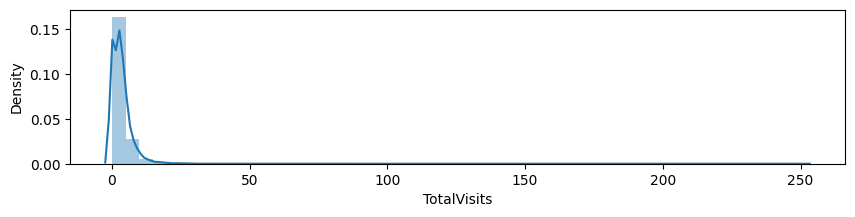

In [43]:
plt.figure(figsize=(10, 2))
sns.distplot(df['TotalVisits'])
plt.show()

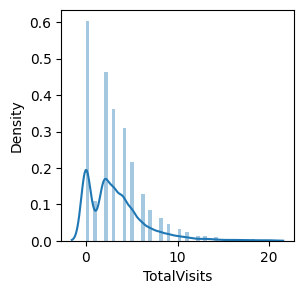

In [44]:
plt.figure(figsize=(3, 3))
sns.distplot(df[df['TotalVisits'].isin(range(0,21))].TotalVisits)
plt.show()

In [49]:
df['Page Views Per Visit'].describe()
# The median of the average number of page views per visit is 2
# The average number of page views per visit do not exceed 3
# 1.48% of the values are missing
# We should impute the median for these missing values

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

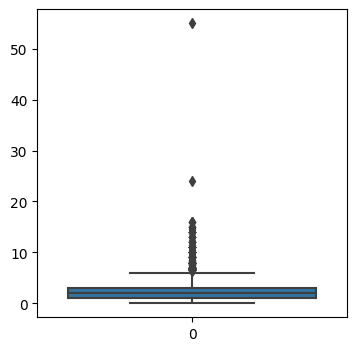

In [59]:
plt.figure(figsize=(4, 4))
sns.boxplot(df['Page Views Per Visit'])
plt.show()

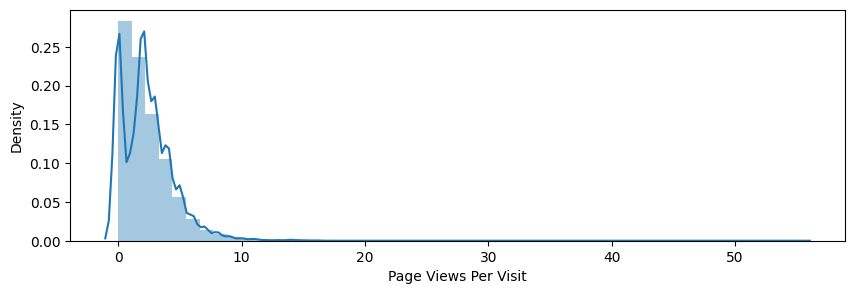

In [65]:
plt.figure(figsize=(10, 3))
sns.distplot(df['Page Views Per Visit'])
plt.show()

In [73]:
df['Last Activity'].value_counts(normalize = True) * 100
# With 1.1% of the values missing, maybe we should just impute "Email Opened" in place of them

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [76]:
df['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

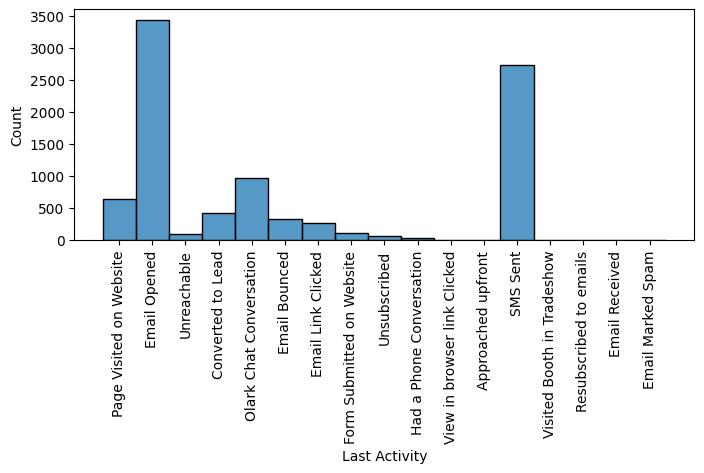

In [67]:
plt.figure(figsize=(8, 3))
sns.histplot(df['Last Activity'])
plt.xticks(rotation='vertical')
plt.show()

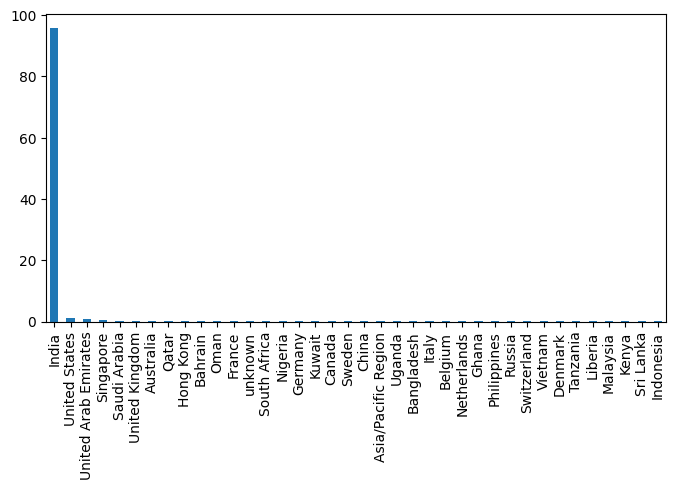

In [78]:
plt.figure(figsize=(8, 4))
(df.Country.value_counts(normalize = True) * 100).plot.bar() 
plt.show()

In [77]:
df.Country.value_counts(normalize = True) * 100
# 95% of the people are from Country "India" and the rest of the countries are below or around 1%
# 26% of the values are missing while "unknown" is 0.07% of the values
# We should impute "India" in the missing values (NaN + unknown) in this case.

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [79]:
df.Specialization.value_counts(normalize = True) * 100
# Null values comprise of 15% of this column while 24% of the values are "Select" which means they were not filled by the people. The "Select" and null values are not different for this column. In total, they account for 39% of the values.
# I think we should drop this column since 39% of the values are not given in this case 

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [80]:
df['How did you hear about X Education'].value_counts(normalize = True) * 100
# While 71% of the values were not filled (that's why they count as "Select"), 23% of the values are missing
# This column has no useful information for us to get insights from
# We should drop this column

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [81]:
df['What is your current occupation'].value_counts(normalize = True) * 100
# We should impute 'Unemployed' in the case of missing values in this case

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [82]:
df['What matters most to you in choosing a course'].value_counts(normalize = True) * 100
# Drop this column, it doesn't have the necessary amount of variance to contribute in predictions

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [83]:
df['Tags'].value_counts(normalize = True) * 100
# Maybe we should just drop this column because it seems useless and has more than 30% (36% in total) missing values.

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [5]:
df['Lead Quality'].value_counts(normalize = True) * 100
# Maybe we should just impute 'Might be' in the case of missing values in this case

Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64

In [4]:
df['Lead Profile'].value_counts(normalize = True) * 100
# Maybe we should just impute Select in the case of missing values in this case

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [10]:
df['City'].value_counts(normalize = True) * 100
# Drop this column, it doesn't have the necessary amount of variance to contribute in predictions
# In addition, 15% values are missing and 28% values are not given i.e they are missing too, 43% missing values, drop it

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [99]:
for col in ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']:
    print(col)
    print(str((df[col].isnull().sum()/len(df))*100) + '%')
    print()

# With more than 45% of the values missing in these 4 columns, they should be all be dropped.

Asymmetrique Activity Index
45.64935064935065%

Asymmetrique Profile Index
45.64935064935065%

Asymmetrique Activity Score
45.64935064935065%

Asymmetrique Profile Score
45.64935064935065%



In [12]:
df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [14]:
print(df['Do Not Email'].value_counts(normalize = True) * 100)
print()
print(df['Do Not Call'].value_counts(normalize = True) * 100)

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64


In [15]:
df.Converted.value_counts(normalize = True) * 100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

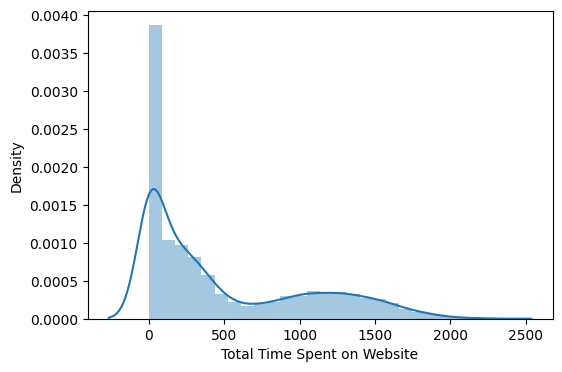

In [19]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Total Time Spent on Website'])
plt.show()